**Heart Disease Prediction**

In [6]:
#Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 

In [7]:
#Load dataset
df = pd.read_csv('HeartDisease.csv')

In [8]:
#Check for missing values
print(df.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


**Exploratory Data Analysis**


In [9]:
#Print first 5 rows
print(df.head())

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [10]:
print(df.describe())

               age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000000              130.000000    240.00000      152.000000   
75%      61.000000              140.000000    275.00000      166.000000   
max      77.000000              200.000000    564.00000      202.000000   

           oldpeak       target  
count  1025.000000  1025.000000  
mean      1.071512     0.513171  
std       1.175053     0.500070  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.800000     1.000000  
75%       1.800000     1.000000  
max       6.200000     1.000000  


In [11]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


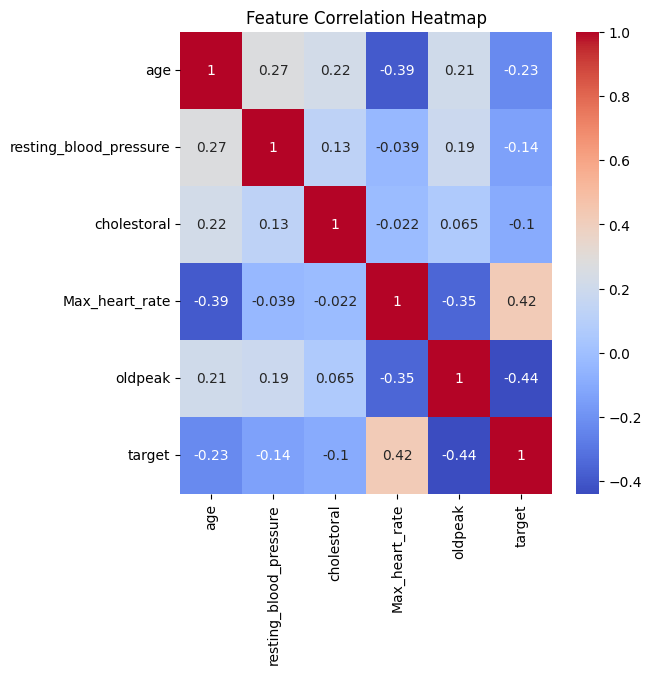

In [15]:
#For only numeric features
numeric_df = df.select_dtypes(include='number')


#Correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

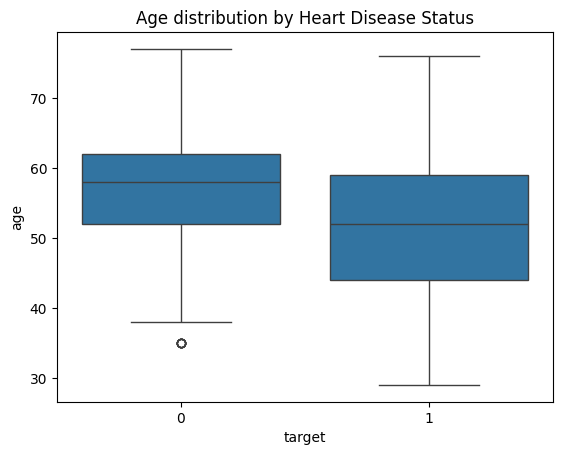

In [16]:
# Example: distribution of age vs target
sns.boxplot(data=df, x='target', y='age')
plt.title('Age distribution by Heart Disease Status')
plt.show()

**Train a Logistic Regression Model**

In [21]:
#Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [22]:
# Train or test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [25]:
#Predictions
y_pred = model.predict(X_test)

#For ROC curve
y_proba = model.predict_proba(X_test)[:, 1]  

**Evaluate a Logistic Regression Model**

In [26]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8146341463414634


In [27]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



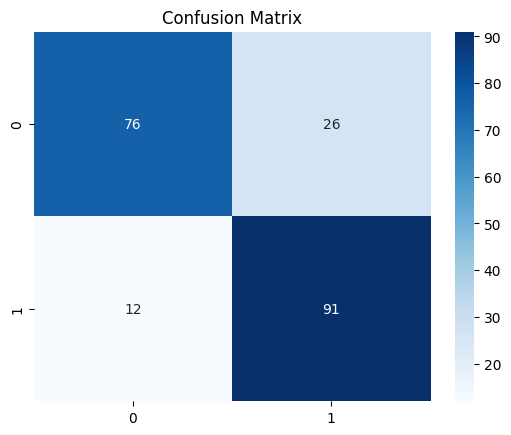

In [28]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

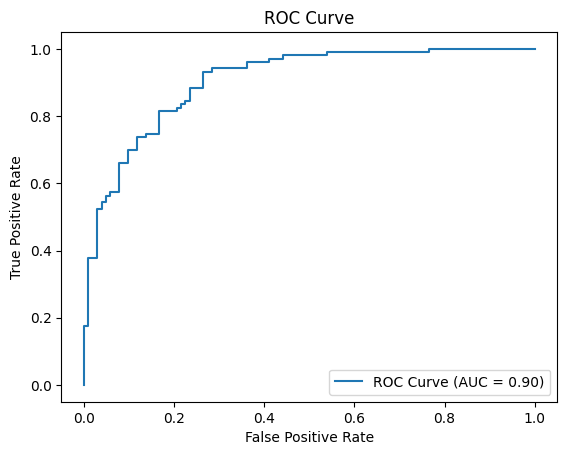

In [29]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

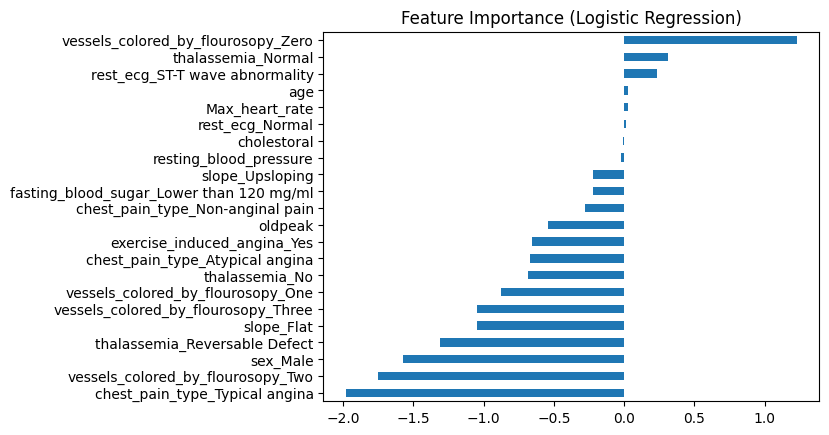

In [30]:
#Feature Importance
coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs.sort_values().plot(kind='barh', title='Feature Importance (Logistic Regression)')
plt.show()

**Train a DecisionTreeClassifier Model**

In [33]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
#Predictions
y_pred = model.predict(X_test)

#For ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

**Evaluate a DecisionTree Classifier Model**

In [35]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9853658536585366


In [36]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



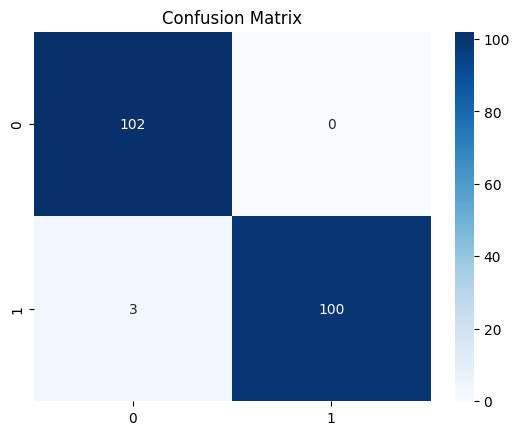

In [39]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

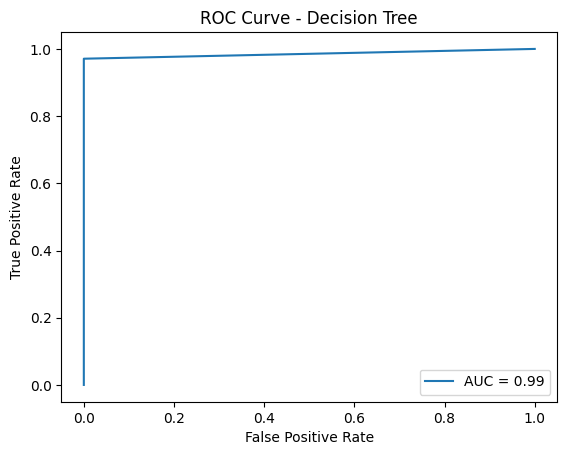

In [41]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


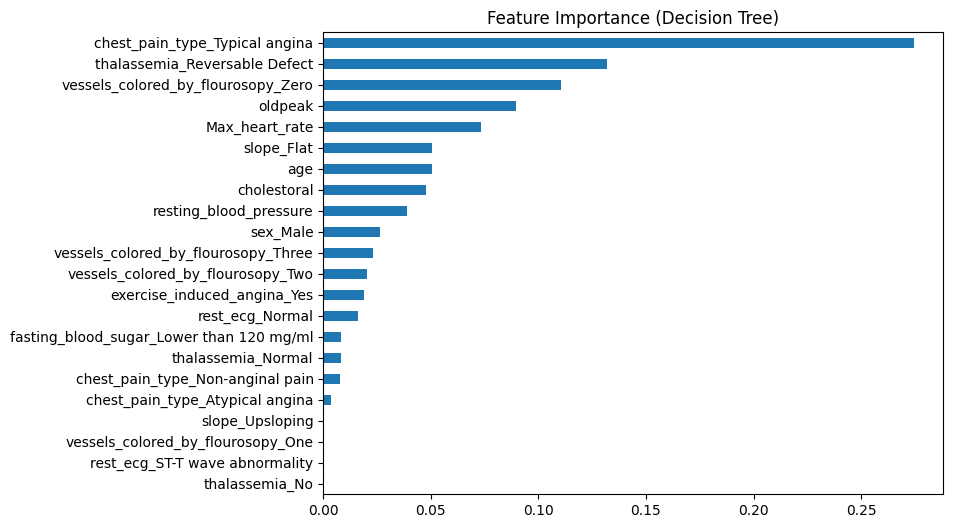

In [42]:
#Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance (Decision Tree)', figsize=(8,6))
plt.show()